In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
data = pd.read_csv('creditcard.csv')

In [ ]:
# Display the first few rows of the dataset
data.head()

# Get summary statistics of the dataset
data.describe()

# Check for missing values
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
# Check for unique values in each column to find any remaining non-numeric entries
for column in data.columns:
    print(f"Column: {column}")
    print(data[column].unique())
    print("-" * 30)


Column: Time
[    0     1     2 ... 31905 31906 31907]
------------------------------
Column: V1
[-1.35980713  1.19185711 -1.35835406 ...  1.17185236  1.20932967
 -0.18465297]
------------------------------
Column: V2
[-0.07278117  0.26615071 -1.34016307 ...  0.71804216 -1.13024207
  0.37669276]
------------------------------
Column: V3
[ 2.53634674  0.16648011  1.77320934 ... -0.22752092  1.61426061
  0.63298768]
------------------------------
Column: V4
[ 1.37815522e+00  4.48154078e-01  3.79779593e-01 ...  1.37372244e+00
  2.64802419e-04 -2.28236474e+00]
------------------------------
Column: V5
[-0.33832077  0.06001765 -0.50319813 ...  0.1523492  -1.9744159
  0.40355317]
------------------------------
Column: V6
[ 0.46238778 -0.08236081  1.80049938 ... -0.94983954  0.26231959
 -0.3716659 ]
------------------------------
Column: V7
[ 0.23959855 -0.07880298  0.79146096 ...  0.27142735 -1.36955354
  0.69535908]
------------------------------
Column: V8
[ 0.0986979   0.08510165  0.24767

In [ ]:
# Step 1: Replace '-' with NaN and convert to numeric
data.replace('-', np.nan, inplace=True)  # Replace '-' with NaN
data = data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric (will set non-convertible values to NaN)

# Step 2: Handle missing values (fill or drop)
data.fillna(data.mean(), inplace=True)  # Fill NaN with mean
# Alternatively, you can drop rows with NaN values
# data.dropna(inplace=True)

# Step 3: Recheck for any remaining missing values
print(data.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
# Inspect unique values in the target variable
print(data['Class'].unique())


[0.         1.         0.00393107]


In [ ]:
# Convert target variable to binary (0 and 1)
data['Class'] = (data['Class'] > 0).astype(int)  # Assuming 'Class' > 0 indicates fraud


In [ ]:
# Check data types
print(data.dtypes)

# If needed, explicitly convert the target to integer type
data['Class'] = data['Class'].astype(int)


Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [ ]:
# Check unique values in the target variable
print("Unique values in Class column:", data['Class'].unique())

# Ensure 'Class' is of type int (not strictly necessary since it's already int64)
data['Class'] = data['Class'].astype(int)

# Separate Features and Target
X = data.drop(columns=['Class'])  # Features
y = data['Class']  # Target variable

# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the feature data

# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Check shapes to ensure proper splitting
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Unique values in Class column: [0 1]
Training set size: (30507, 30), Test set size: (13075, 30)


In [ ]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": report['1']['precision'],
        "Recall": report['1']['recall'],
        "F1 Score": report['1']['f1-score']
    }


Model Performance:
                         Accuracy  Precision    Recall  F1 Score
Logistic Regression     0.974837   0.981776  0.967460  0.974565
Random Forest           0.999847   0.999693  1.000000  0.999847
Gradient Boosting       0.999235   0.998620  0.999847  0.999233
Support Vector Machine  0.983939   0.989291  0.978358  0.983794
Decision Tree           0.996558   0.994800  0.998312  0.996553
K-Nearest Neighbors     0.999082   0.998161  1.000000  0.999080


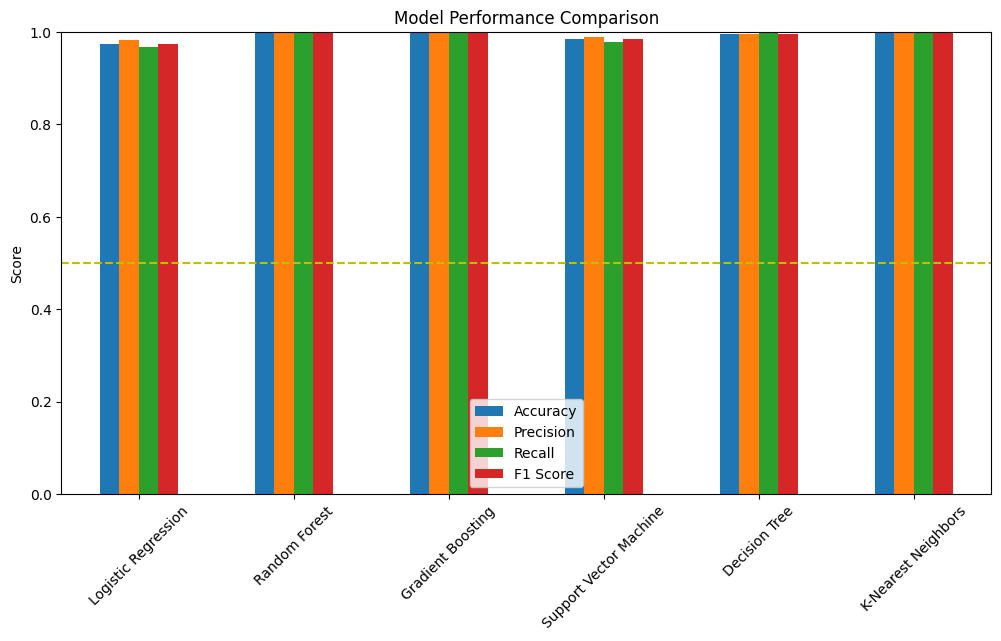

In [ ]:
# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print("\nModel Performance:\n", results_df)

# Visualize the performance
results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.axhline(y=0.5, color='y', linestyle='--')  # Reference line at 0.5 for better understanding
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid (with corrected max_features)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],  # Replaced 'auto' with valid options
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize Randomized Search
randomized_search = RandomizedSearchCV(estimator=rf_model,
                                       param_distributions=param_grid,
                                       n_iter=10,  # Adjust for faster testing
                                       cv=3,
                                       scoring='accuracy',
                                       verbose=2,
                                       n_jobs=-1)

# Fit the Randomized Search
randomized_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = randomized_search.best_params_
best_score = randomized_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}
Best Cross-Validation Accuracy: 0.9997


Test Set Accuracy: 0.9998
Test Set Precision: 0.9997
Test Set Recall: 1.0000
Test Set F1 Score: 0.9998


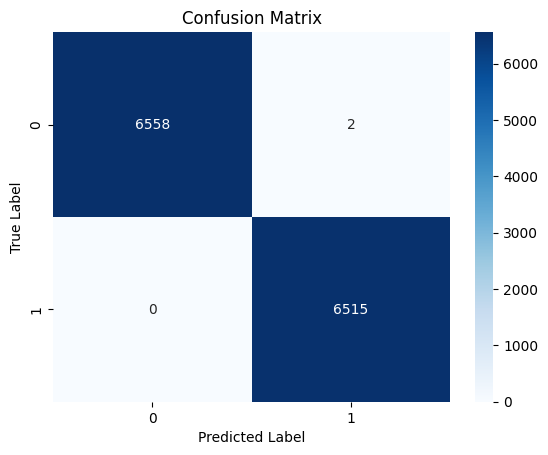

In [ ]:
# Import necessary metrics
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize the RandomForestClassifier with the best parameters
final_rf_model = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=30,
    random_state=42
)

# Train the model on the entire training set
final_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation results
print(f"Test Set Accuracy: {accuracy:.4f}")
print(f"Test Set Precision: {precision:.4f}")
print(f"Test Set Recall: {recall:.4f}")
print(f"Test Set F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
